# ___Raw Analysis___
---
---


## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import plotly.express as px
from geopy.geocoders import Nominatim
import geopy as gp
from datetime import datetime

## Data
---

In [3]:
data = pd.read_csv('data/meteorite-landings.csv')
print(data.columns)

data.head()

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'GeoLocation'],
      dtype='object')


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


## Quick Look
---

In [5]:
print("Data described: \n")
print(data.describe())
print('\n')
print("Data info: \n")
print(data.info())
print('\n')
print("Data types: \n")
print(data.dtypes)

Data described: 

                 id          mass          year        reclat       reclong
count  45716.000000  4.558500e+04  45428.000000  38401.000000  38401.000000
mean   26889.735104  1.327808e+04   1991.772189    -39.122580     61.074319
std    16860.683030  5.749889e+05     27.181247     46.378511     80.647298
min        1.000000  0.000000e+00    301.000000    -87.366670   -165.433330
25%    12688.750000  7.200000e+00   1987.000000    -76.714240      0.000000
50%    24261.500000  3.260000e+01   1998.000000    -71.500000     35.666670
75%    40656.750000  2.026000e+02   2003.000000      0.000000    157.166670
max    57458.000000  6.000000e+07   2501.000000     81.166670    354.473330


Data info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   n

In [8]:
data.nametype.value_counts()
# Under NameType, 'valid' is for most meteorites and 'relict'
# are for objects that were once meteorites but are now highly
# altered by weathering on

Valid     45641
Relict       75
Name: nametype, dtype: int64

## Cleaning
---

In [10]:
# rename columns
data.rename(columns={'recclass':'class', 'reclat':'lat', 'reclong':'long', 'mass (g)':'mass'}, inplace=True)
data.head()

,name,id,nametype,class,mass,fall,year,lat,long,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


## Sampling
### (Test sample size is set to 10%)
### Only comment out once all testing / experiment is done, to use real data
---

In [11]:
# *****************************
# HIGHLY IMPORTANT
# *****************************

# Sample data
print("Original Data Stats: \n")
print(data.describe())

print('\n--------\n')

print("New Sample Data Stats: \n")
data['year'].fillna(0).astype(int)
data['mass'].fillna(0).astype(int)


data = data.sample(frac=0.1)  # 10% sample set
print(data.describe())


Original Data Stats: 

                 id          mass          year           lat          long
count  45716.000000  4.558500e+04  45428.000000  38401.000000  38401.000000
mean   26889.735104  1.327808e+04   1991.772189    -39.122580     61.074319
std    16860.683030  5.749889e+05     27.181247     46.378511     80.647298
min        1.000000  0.000000e+00    301.000000    -87.366670   -165.433330
25%    12688.750000  7.200000e+00   1987.000000    -76.714240      0.000000
50%    24261.500000  3.260000e+01   1998.000000    -71.500000     35.666670
75%    40656.750000  2.026000e+02   2003.000000      0.000000    157.166670
max    57458.000000  6.000000e+07   2501.000000     81.166670    354.473330

--------

New Sample Data Stats: 

                 id          mass         year          lat         long
count   4572.000000  4.562000e+03  4536.000000  3793.000000  3793.000000
mean   27031.823053  3.495610e+04  1991.572090   -39.626677    64.362791
std    16886.665968  1.280904e+06    2

## Plotting
---

### *Fall vs. Fallen*

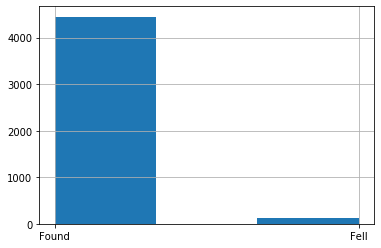

In [12]:
data['fall'].hist(bins=3)  # 
plt.show()

### *Top 10 classifications of meteors*

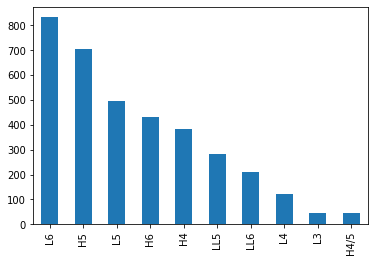

In [13]:
top_10_class = data['class'].value_counts()[:10]
plt.bar(top_10_class, height = 1)

top_10_class.plot(kind='bar')

### *Geolocation Conversion*

In [14]:
geolocator = Nominatim(user_agent="project_impact")

lists = []
for i in range(20):
    lats = data['lat'].get(key = i)
    longs = data['long'].get(key = i)
    coor = gp.Point(lats, longs)
    country = geolocator.reverse(gp.Point(coor)).raw['address'].get('country')
    lists.append(country)
print(lists)

[None, None, 'Canada', None, None, None, None, None, None, None, None, None, None, None, None, 'Nigeria', None, None, None, None]


### *Year vs Mass*

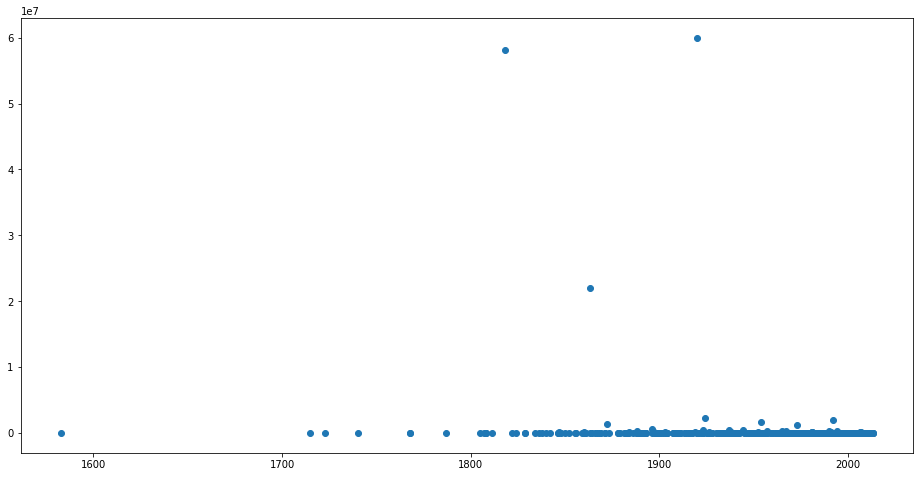

In [18]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['year'], data['mass'])
plt.show()

### Equator or Poles

Above Equator: 830 

At Equator: 623 

Below Equator: 2340 



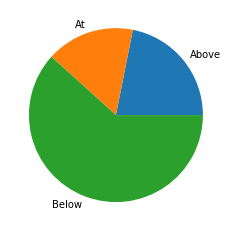

In [19]:
axes = plt.gca()
axes.set_ylim([-90,90])
above_equator = data[data.lat >0].shape[0]
at_equator = data[data.lat ==0].shape[0]
below_equator = data[data.lat <0].shape[0]

print("Above Equator:", above_equator, '\n')
print("At Equator:", at_equator, '\n')
print("Below Equator:", below_equator, '\n')

labels = ["Above", 'At', 'Below']
values = [above_equator, at_equator, below_equator]
plt.pie(values, labels=labels)
plt.show()